In [2]:
# @inproceedings{cakmak2021spatio,
#         author = {Cakmak, Eren and Plank, Manuel and Calovi, Daniel S. and Jordan, Alex and Keim, Daniel},
#         title = {Spatio-Temporal Clustering Benchmark for Collective Animal Behavior},
#         year = {2021},
#         isbn = {9781450391221},
#         publisher = {Association for Computing Machinery},
#         address = {New York, NY, USA},
#         url = {https://doi.org/10.1145/3486637.3489487},
#         doi = {10.1145/3486637.3489487},
#         booktitle = {Proceedings of the 1st ACM SIGSPATIAL International Workshop on Animal Movement Ecology and Human Mobility},
#         pages = {5–8},
#         numpages = {4},
#         location = {Beijing, China},
#         series = {HANIMOB '21}
# }

In [ ]:
# the code is based on the following: https://github.com/eren-ck/st_dbscan/blob/master/README.md

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# import files
file_path_time = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\event_time_list\468.csv" # add file path
df_468_time = pd.read_csv(file_path_time)
print(df_468_time.head())

                                            FOV_file  Event_time  Cell_Number  \
0  cancer_cancer20220308_slip3_area2_long_acq_can...           1            0   
1  cancer_cancer20220308_slip3_area2_long_acq_can...           2            0   
2  cancer_cancer20220308_slip3_area2_long_acq_can...           3            0   
3  cancer_cancer20220308_slip3_area2_long_acq_can...           7            0   
4  cancer_cancer20220308_slip3_area2_long_acq_can...           8            0   

     Slip_Area  cell_x  cell_y  
0  slip3_area2     NaN     NaN  
1  slip3_area2     NaN     NaN  
2  slip3_area2     NaN     NaN  
3  slip3_area2     NaN     NaN  
4  slip3_area2     NaN     NaN  


In [7]:
# # Extract coordinates, time values and slip area
x_values_468 = df_468_time.iloc[:, 4].values
y_values_468 = df_468_time.iloc[:, 5].values
time_values_468 = df_468_time.iloc[:, 1].values
slip_area_468 = df_468_time.iloc[:, 3].astype(str)

# # Filter out rows without coordinates
# valid_indices = ~pd.isnull(x_values_468) & ~pd.isnull(y_values_468)
# x_values_468 = x_values_468[valid_indices]
# y_values_468 = y_values_468[valid_indices]
# time_values_468 = time_values_468[valid_indices]

# # Normalise distance values
# scaler = MinMaxScaler() # Initialize the MinMaxScaler
# x_values_rescaled_468 = x_values_468.reshape(-1, 1)
# y_values_rescaled_468 = y_values_468.reshape(-1, 1)

# x_normalized_468 = scaler.fit_transform(x_values_rescaled_468)
# y_normalized_468 = scaler.fit_transform(y_values_rescaled_468)

# # x_normalized = df.iloc[:, 6].values # normalisation and not normalising gives the same results
# # y_normalized = df.iloc[:, 7].values

# # Create new DataFrame with normalised coordinates and time
# coordinates_data_468 = pd.DataFrame({'X': x_normalized_468.flatten(), 'Y': y_normalized_468.flatten()})

# # Add slip area to coordinates data
# data_468 = pd.concat([pd.DataFrame({'Time': time_values_468}), coordinates_data_468, slip_area_468], axis=1)



valid_indices = pd.notnull(x_values_468) & pd.notnull(y_values_468)

# Filter out rows with NaN values for both x and y coordinates
x_values_468 = x_values_468[valid_indices]
y_values_468 = y_values_468[valid_indices]
time_values_468 = time_values_468[valid_indices]
slip_area_468 = slip_area_468[valid_indices]

# Normalise distance values
scaler = MinMaxScaler() # Initialize the MinMaxScaler
x_values_rescaled_468 = x_values_468.reshape(-1, 1)
y_values_rescaled_468 = y_values_468.reshape(-1, 1)

x_normalized_468 = scaler.fit_transform(x_values_rescaled_468)
y_normalized_468 = scaler.fit_transform(y_values_rescaled_468)

# Create new DataFrame with normalised coordinates and time
coordinates_data_468 = pd.DataFrame({'X': x_normalized_468.flatten(), 'Y': y_normalized_468.flatten()})

# Add slip area to coordinates data
data_468 = pd.concat([pd.DataFrame({'Time': time_values_468}), coordinates_data_468, slip_area_468], axis=1)



In [8]:
print(data_468.head())

    Time         X         Y Slip_Area
0  284.0  0.735772  0.011010       NaN
1  285.0  0.735772  0.011010       NaN
2  286.0  0.735772  0.011010       NaN
3  287.0  0.735772  0.011010       NaN
4   68.0  0.231770  0.155737       NaN


In [ ]:
# Plot function
def plot(coord_values, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]

        clust = coord_values[labels == i]
        plt.scatter(clust.iloc[:, 0], clust.iloc[:, 1], c=[col], s=15)
    plt.show()

# Perform ST-DBSCAN for each slip area
slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    subset = data_468[data_468['Slip_Area'] == slip_area]  
    
    # Plot for each slip
    # plt.scatter(subset['X'], subset['Y'])
    # plt.title(f'Excitation Plot - {slip_area}')
    # plt.xlabel('X Coordinate')
    # plt.ylabel('Y Coordinate')
    # plt.show()

    st_dbscan_468 = ST_DBSCAN(eps1=0.01, eps2=2000, min_samples=6) 
    #eps1 = distance radius, eps2  = time radius, min_samples = min number of points for a core point
    #to calculate optimum min_sample, use 2*dimensions(D), hence for three dimensions, use 6
    coord_values_468 = subset.iloc[:, :-1]  # Select columns 0, 1, and 2
    st_dbscan_468.fit(coord_values_468)
    
    cluster_labels_468 = st_dbscan_468.labels
    
    # Plot clusters for each slip area
    plt.title("DBSCAN Clustering for Slip Area: " + slip_area) 
    plot(coord_values_468.iloc[:, 1:], cluster_labels_468)
    num_clusters_468.append(len(np.unique(cluster_labels_468[cluster_labels_468 != -1])))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.barh(slip_area_combinations_468, num_clusters_468, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Slip Area')
plt.title(f'Number of Clusters per Slip Area - Breast Cancer Type: L468')
plt.grid(axis='x', alpha=0.5)
plt.show()


In [ ]:
# ANALYSIS ON GAP JUNCTIONS: 
# 1. increase distance (eps1) for contant time (1 second)
#   hypothesis: number of clusters will decrease or stay the same 

slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    # Extract subset for each slip area
    subset = data_468[data_468['Slip_Area'] == slip_area]  

    # Define range of eps2 values
    eps1_values = range(0,1)  # Range from 0 to 100, inclusive
    num_clusters_for_eps1 = []  # Store the number of clusters for each eps2 value
    
    for eps1 in eps1_values:
        # Apply ST_DBSCAN for each eps1 value
        st_dbscan_468 = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6) 
        time_coord_values = subset.iloc[:, [1, 4, 5]]
        st_dbscan_468.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels_468 = st_dbscan_468.labels
        
        # Count number of clusters (excluding noise)
        num_clusters_for_eps2.append(len(np.unique(cluster_labels_468[cluster_labels_468 != -1])))
    
    # Plotting the number of clusters vs eps1 for the slip area
    plt.plot(eps2_values, num_clusters_for_eps1)
    plt.title(f'Number of Clusters vs Eps1 for Slip Area - {slip_area}')
    plt.xlabel('Eps1')
    plt.ylabel('Number of Clusters')
    plt.grid(True)
    plt.show()
    
    # Store number of clusters for each eps1 value for this slip area
    num_clusters_468.append(num_clusters_for_eps1)


In [ ]:
# ANALYSIS ON GAP JUNCTIONS: 
# 2. increase time (eps2) for contant distance (0.05)
#   hypothesis: number of clusters should be the same 

slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    # Extract subset for each slip area
    subset = data_468[data_468['Slip_Area'] == slip_area]  

 # Define range of eps2 values
    eps2_values = range(100,1000)  # CHANGE TIME RANGE HERE
    num_clusters_for_eps2 = []  # Store the number of clusters for each eps2 value
    
    for eps2 in eps2_values:
        # Apply ST_DBSCAN for each eps2 value
        st_dbscan_468 = ST_DBSCAN(eps1=0.05, eps2=eps2, min_samples=6) 
        time_coord_values = subset.iloc[:, [1, 4, 5]]
        st_dbscan_468.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels_468 = st_dbscan_468.labels
        
        # Count number of clusters (excluding noise)
        num_clusters_for_eps2.append(len(np.unique(cluster_labels_468[cluster_labels_468 != -1])))
    
    # Plotting the number of clusters vs eps2 for the slip area
    plt.plot(eps2_values, num_clusters_for_eps2)
    plt.title(f'Number of Clusters vs Eps2 for Slip Area - {slip_area}')
    plt.xlabel('Eps2')
    plt.ylabel('Number of Clusters')
    plt.grid(True)
    plt.show()
    
    # Store number of clusters for each eps2 value for this slip area
    num_clusters_468.append(num_clusters_for_eps2)

In [ ]:
# ANALYSIS ON CALCIUM CHANNELS: 
# 1. increase distance (eps1) for contant time (1 second)
#   hypothesis: number of clusters will decrease or stay the same 

slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    # Extract subset for each slip area
    subset = data_468[data_468['Slip_Area'] == slip_area]  

    # Define range of eps2 values
    eps1_values = range(0,1)  # Range from 0 to 100, inclusive
    num_clusters_for_eps1 = []  # Store the number of clusters for each eps2 value
    
    for eps1 in eps1_values:
        # Apply ST_DBSCAN for each eps1 value
        st_dbscan_468 = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6) 
        time_coord_values = subset.iloc[:, [1, 4, 5]]
        st_dbscan_468.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels_468 = st_dbscan_468.labels
        
        # Count number of clusters (excluding noise)
        num_clusters_for_eps2.append(len(np.unique(cluster_labels_468[cluster_labels_468 != -1])))
    
    # Plotting the number of clusters vs eps1 for the slip area
    plt.plot(eps2_values, num_clusters_for_eps1)
    plt.title(f'Number of Clusters vs Eps1 for Slip Area - {slip_area}')
    plt.xlabel('Eps1')
    plt.ylabel('Number of Clusters')
    plt.grid(True)
    plt.show()
    
    # Store number of clusters for each eps1 value for this slip area
    num_clusters_468.append(num_clusters_for_eps1)


In [ ]:
# ANALYSIS ON CALCIUM CHANNELS: 
# 2. increase time (eps2) for contant distance (0.05)
#   hypothesis: number of clusters should be the same 

slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    # Extract subset for each slip area
    subset = data_468[data_468['Slip_Area'] == slip_area]  

 # Define range of eps2 values
    eps2_values = range(100,1000)  # CHANGE TIME RANGE HERE
    num_clusters_for_eps2 = []  # Store the number of clusters for each eps2 value
    
    for eps2 in eps2_values:
        # Apply ST_DBSCAN for each eps2 value
        st_dbscan_468 = ST_DBSCAN(eps1=0.05, eps2=eps2, min_samples=6) 
        time_coord_values = subset.iloc[:, [1, 4, 5]]
        st_dbscan_468.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels_468 = st_dbscan_468.labels
        
        # Count number of clusters (excluding noise)
        num_clusters_for_eps2.append(len(np.unique(cluster_labels_468[cluster_labels_468 != -1])))
    
    # Plotting the number of clusters vs eps2 for the slip area
    plt.plot(eps2_values, num_clusters_for_eps2)
    plt.title(f'Number of Clusters vs Eps2 for Slip Area - {slip_area}')
    plt.xlabel('Eps2')
    plt.ylabel('Number of Clusters')
    plt.grid(True)
    plt.show()
    
    # Store number of clusters for each eps2 value for this slip area
    num_clusters_468.append(num_clusters_for_eps2)

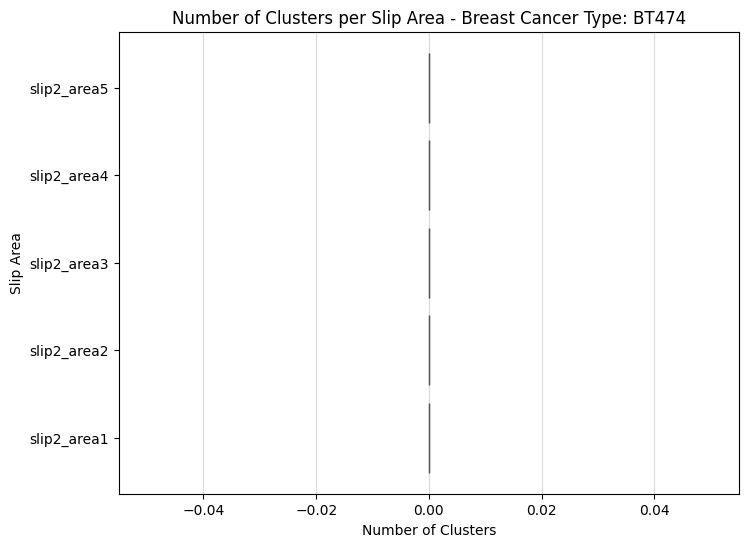

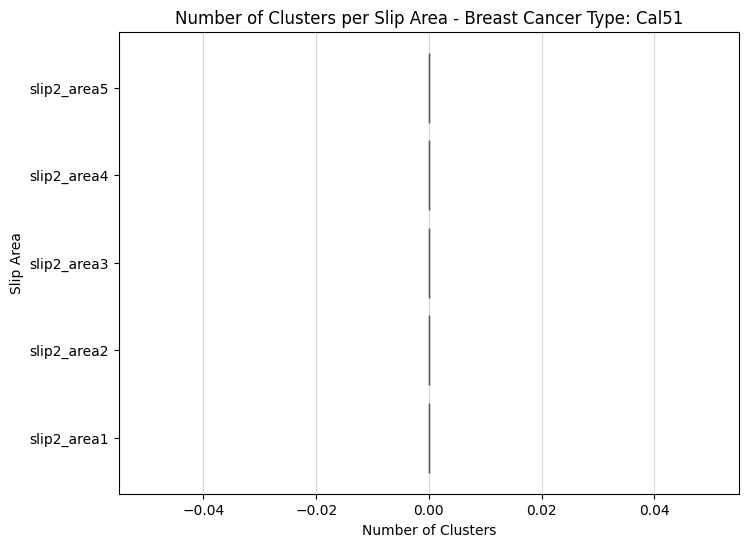

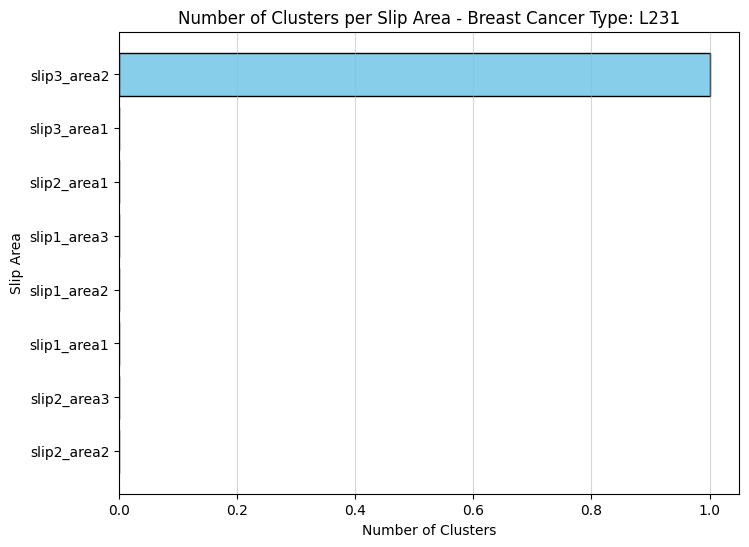

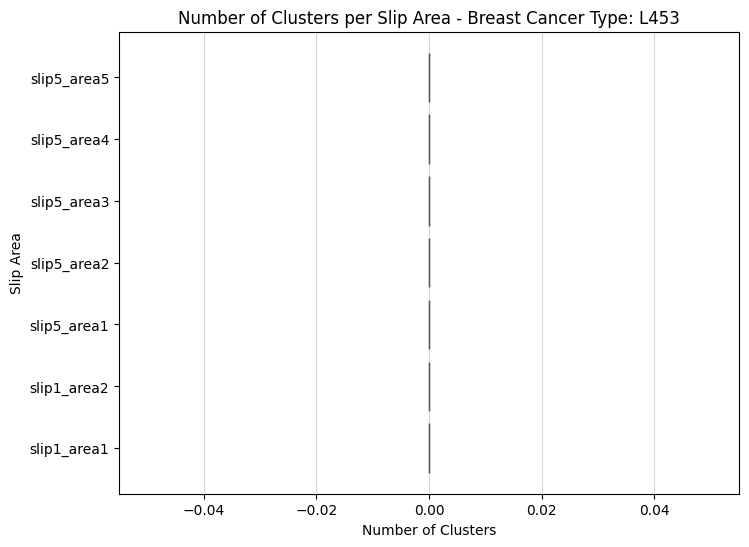

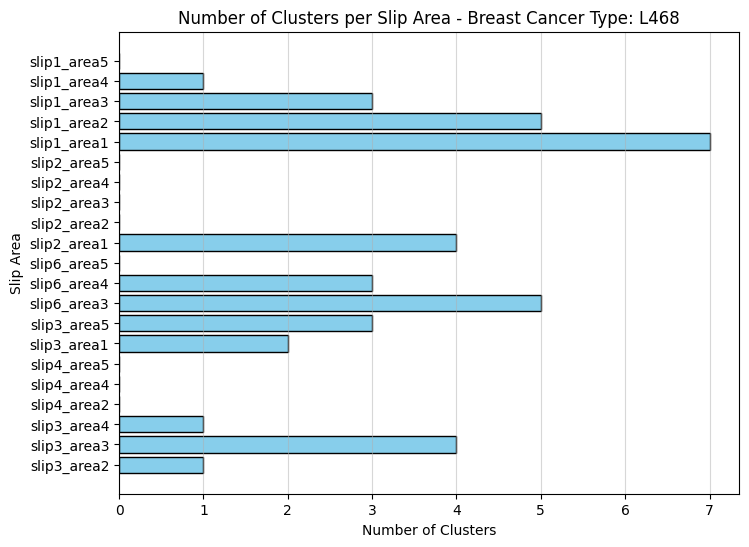

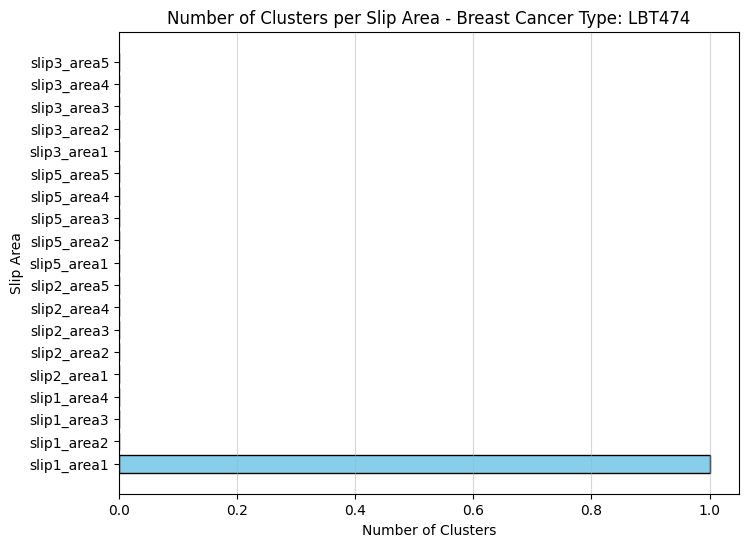

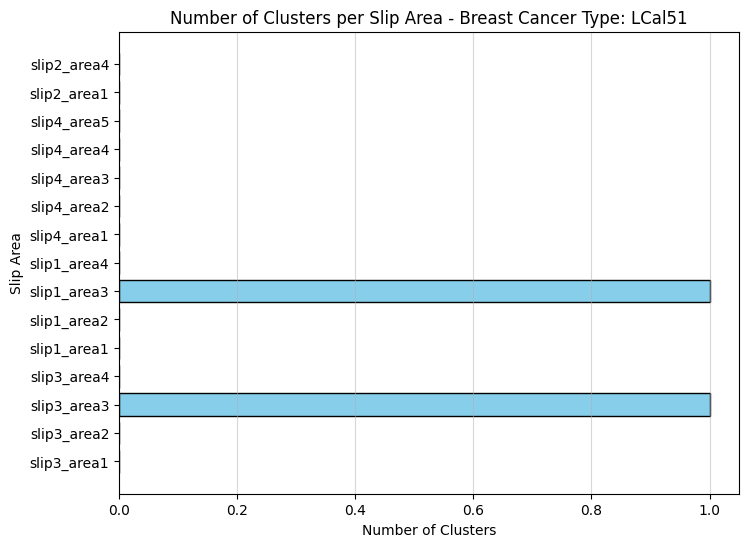

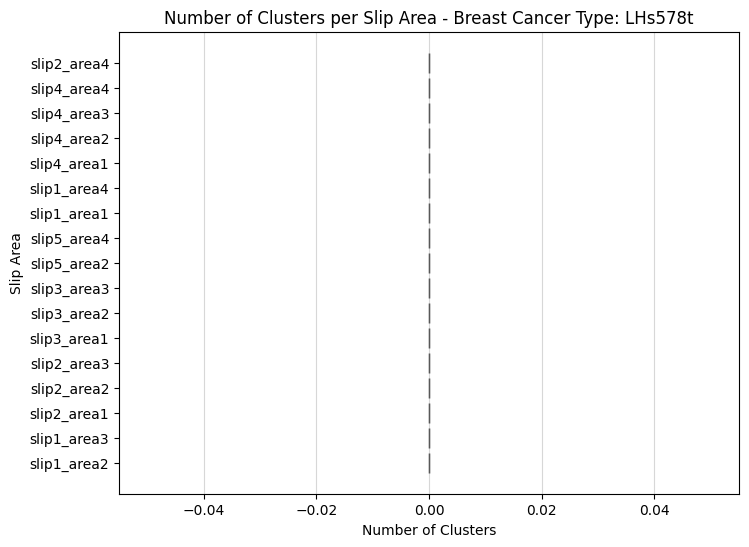

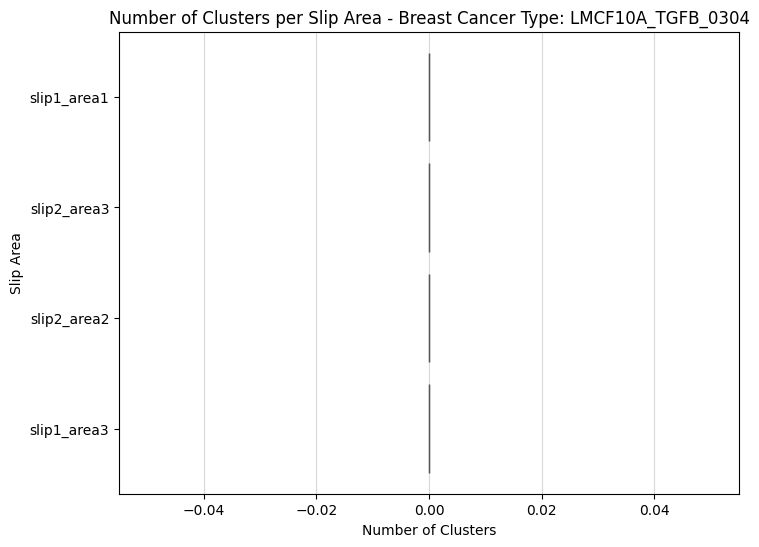

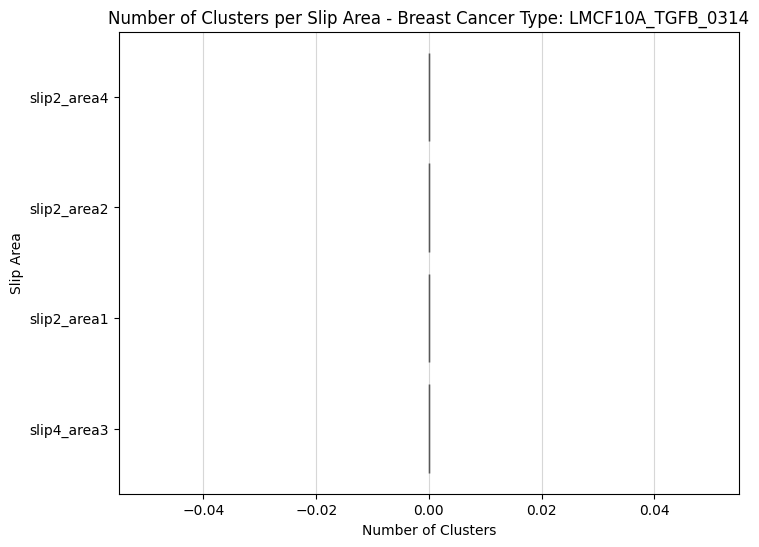

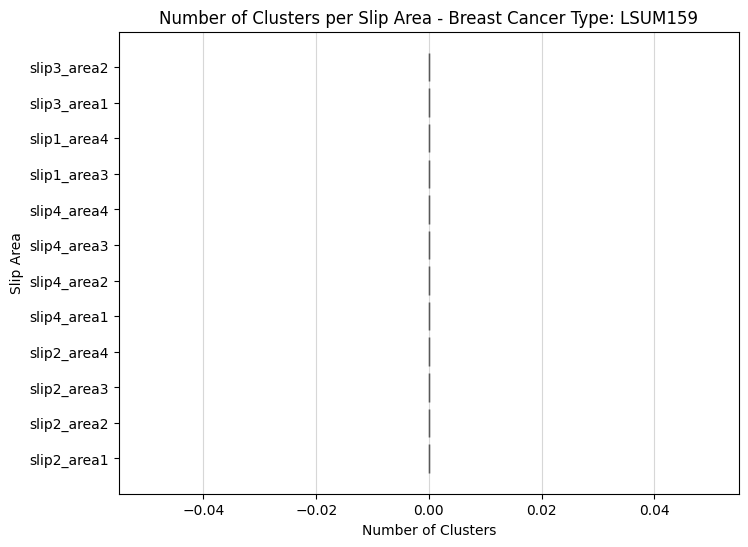

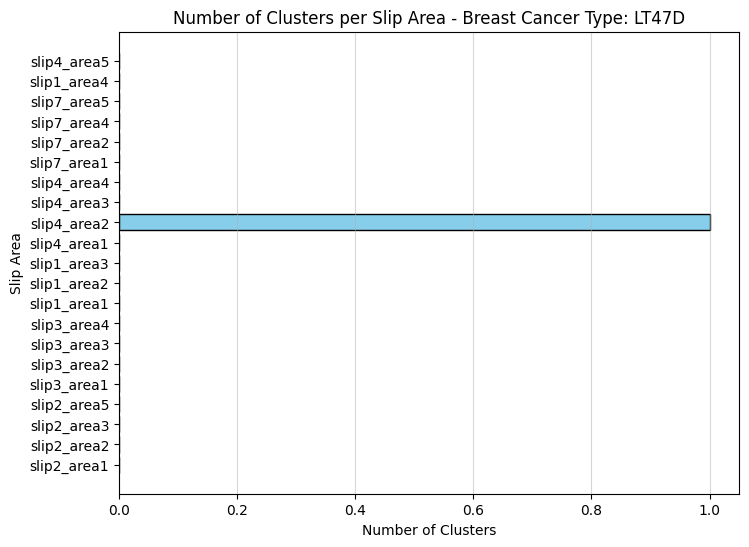

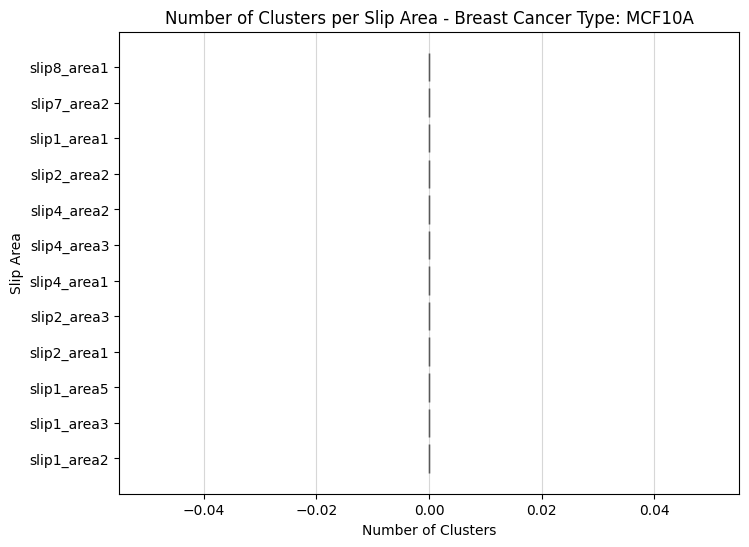

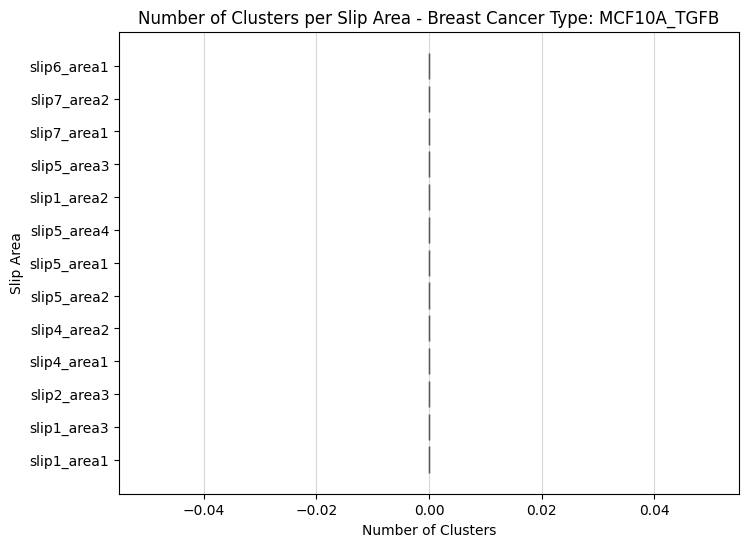

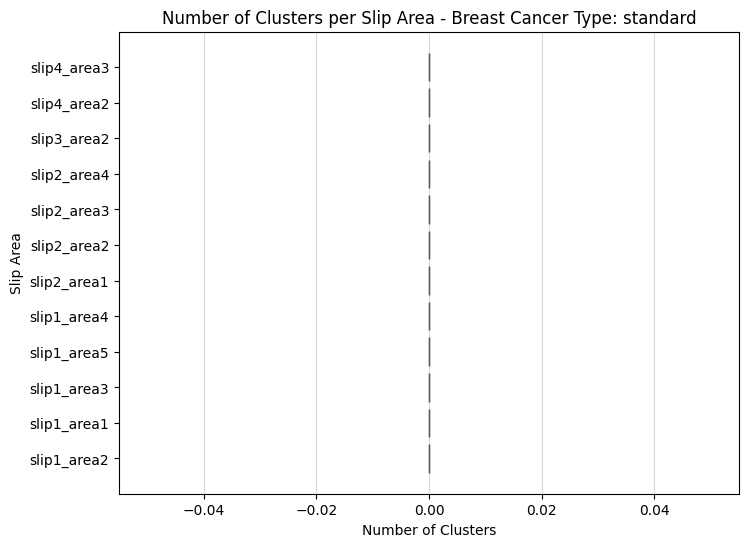

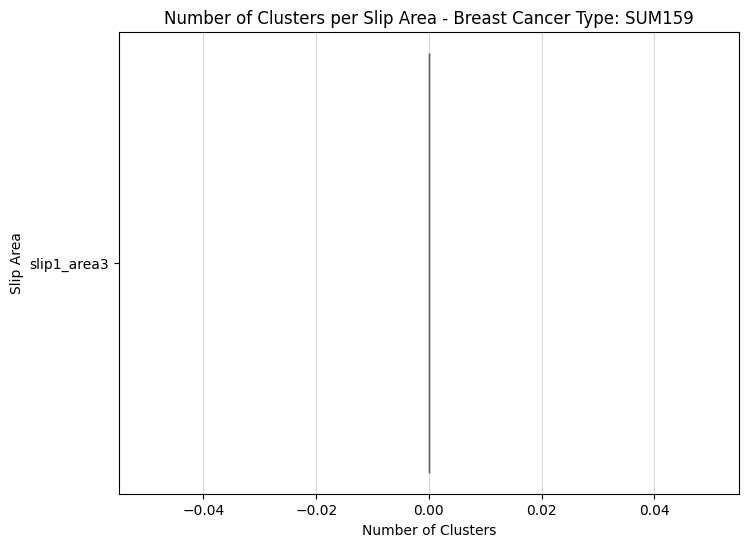

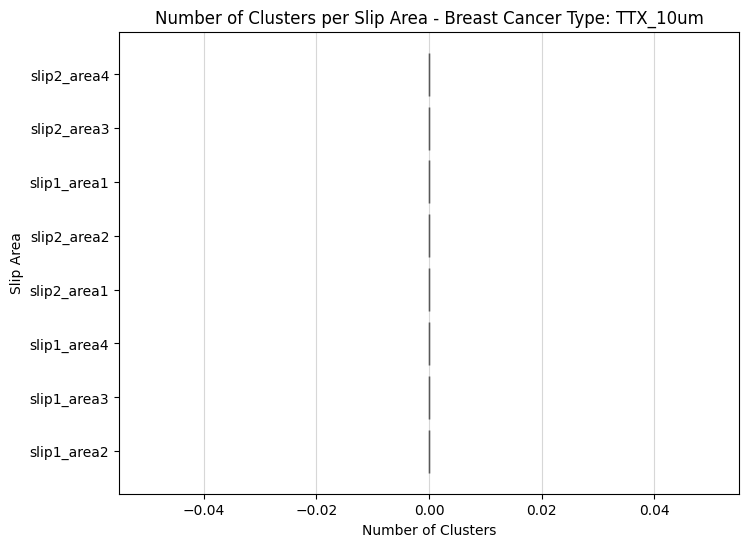

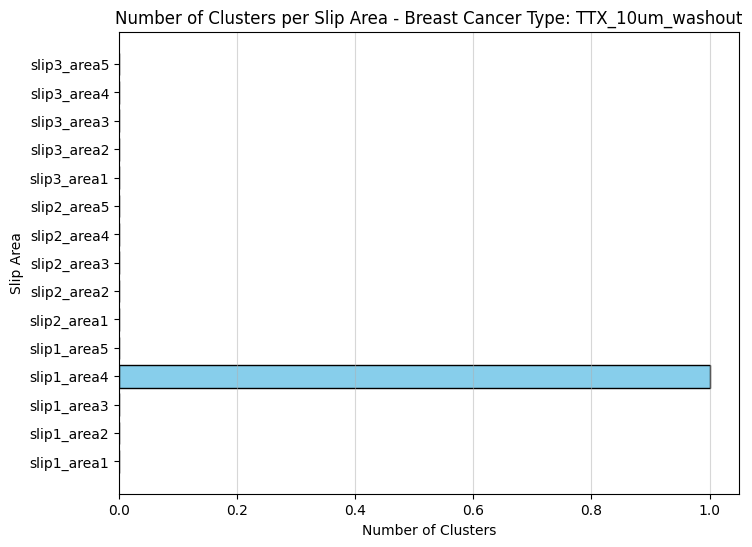

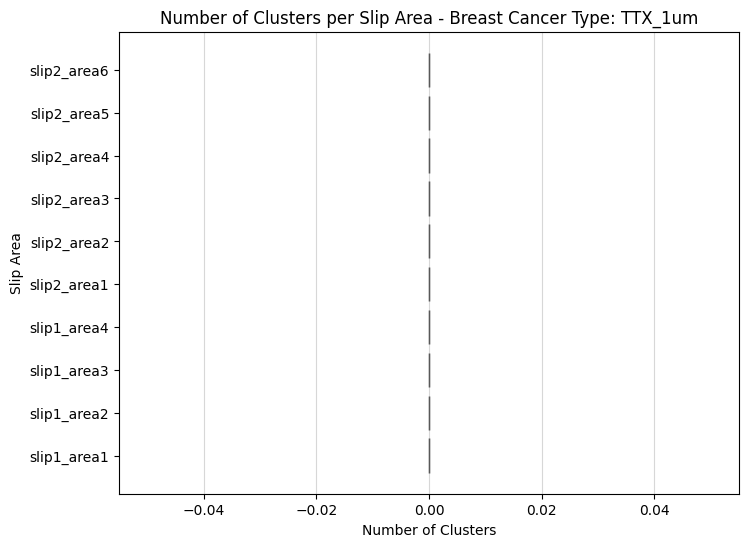

In [166]:
#plot histogram for all breast cancer cell types
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from st_dbscan import ST_DBSCAN

folder_path = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\eventdata"

# Loop for each file in folder
for filename in os.listdir(folder_path):
    if not filename.endswith('_events.csv'):
        continue

   

In [167]:
# Find optimum eps 1 for each cell line

import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import numpy as np

folder_path = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\eventdata"

# Loop for each file in folder
for filename in os.listdir(folder_path):
    if not filename.endswith('_events.csv'):
        continue

    # Extract breast cancer type name from file name
    cancer_type = filename[:-11]  # Remove "_events.csv" from filename
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    # Extract coordinates
    coordinates = df.iloc[:, 6:8]

    # Normalize coordinates
    scaler = MinMaxScaler() # Initialize the MinMaxScaler
    coordinates_normalized = scaler.fit_transform(coordinates)

    # Perform Nearest Neighbors to find distances
    neighbors = NearestNeighbors(n_neighbors=4) # k-means for 2 dimensions hence 4
    neighbors_fit = neighbors.fit(coordinates_normalized)
    distances, indices = neighbors_fit.kneighbors(coordinates_normalized)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]

    # Define the range for the x-axis
    start_index = 6000 if len(distances) > 6000 else 0
    end_index = len(distances)
    x_axis_range = range(start_index, end_index)

    # Find the knee point
    kneedle = KneeLocator(x_axis_range, distances[start_index:end_index], curve='convex', direction='increasing')
    print("Optimal epsilon value for", cancer_type, "is:", kneedle.knee_y)

Optimal epsilon value for BT474 is: 0.06058941375547523
Optimal epsilon value for Cal51 is: 0.0
Optimal epsilon value for L231 is: 0.0
Optimal epsilon value for L453 is: 0.0
Optimal epsilon value for L468 is: 0.032217001584938426
Optimal epsilon value for LBT474 is: 0.02469445865294609
Optimal epsilon value for LCal51 is: 0.038861991786485736
Optimal epsilon value for LHs578t is: 0.0
Optimal epsilon value for LMCF10A_TGFB_0304 is: 0.19978295859320444
Optimal epsilon value for LMCF10A_TGFB_0314 is: 0.2754497081270527
Optimal epsilon value for LSUM159 is: 0.0627410849533624
Optimal epsilon value for LT47D is: 0.053395097620604404
Optimal epsilon value for MCF10A is: 0.09325524874027162
Optimal epsilon value for MCF10A_TGFB is: 0.06181128990373661
Optimal epsilon value for standard is: 0.043628387020017985
Optimal epsilon value for SUM159 is: None
Optimal epsilon value for TTX_10um is: 0.04809760177139862
Optimal epsilon value for TTX_10um_washout is: 0.049492339910458545
Optimal epsilon 

c:\Users\ainii\AppData\Local\Programs\Python\Python310\lib\site-packages\kneed\knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))
